# Tobig's 20기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [3]:
data.size

800

## Train Test 데이터 나누기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [8]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [9]:
# parameter 개수
N = len(X_train.loc[0])
print(N)

3


In [10]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.63784318, 0.31700529, 0.75486233])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [11]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p(x) = \frac{1}{1+e^{-z}}$

In [12]:
def logistic(X, parameters):
    z = np.dot(X, parameters)
    p = 1 / (1 + np.exp(-z))    
    return p

In [13]:
logistic(X_train.iloc[1], parameters)

0.7401724542231679

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = - \Sigma\{y_ilogp(X_i) + (1-y_i)log(1-p(X_i))\}$ 

In [14]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = 1 / (1 + np.exp(-np.dot(X, parameters)))
    loss = - (y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

In [15]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters)
    loss = 0.5 * np.square(y - y_hat)
    return loss

In [16]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [17]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.2407207385157148

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma(y_i - \theta^{T}X_i)X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma(y_i - P(X_i))X_{ij}$

In [51]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters)
        gradient = -(y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = -(y - p) * X[j]
    return gradient

In [52]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.10172424325089834

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [53]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [54]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[51.64692458408039, 7.4714466865636275, 42.41211864763828]

## mini-batch
인덱스로 미니 배치 나누기

In [55]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 이 함수는 주어진 데이터셋 X_train과 배치 크기 batch_size를 입력으로 받아서, 배치 인덱스 리스트를 생성하는 함수입니다. X_train의 총 샘플 개수를 N으로 저장하고, 배치 개수 nb를 계산합니다. 그 후 0부터 N-1까지의 정수를 가지는 배열 idx를 생성한 뒤 idx 배열을 배치 크기로 나누어 배치 인덱스 리스트 idx_list를 생성합니다. if 부분은 배치의 크기가 배치 크기보다 작을 경우 배치 인덱스 리스트에 포함되지 않도록 조건을 추가합니다. 

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [56]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= (learning_rate / n)
    
    parameters -= gradients
    return parameters

In [57]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.62759326, 0.30970041, 0.74522807])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 전체 데이터셋을 이용해 학습한 횟수 
- num_epoch: 경사하강법을 통해 학습할 때 정해진 학습 epoch 수
<br>

BGD: 학습 한 번(1 iteration)에 모든 데이터셋을 이용해 기울기를 업데이트  
SGD: 학습 한 번(1 iteration)에 1개의 데이터를 이용해 기울기를 업데이트
MGD: BGD와 SGD의 절충안으로 학습 한 번(1 iteration)에 데이터셋의 일부만 사용해 기울기를 업데이트  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
- batch_size=1 -> SGD  
- batch_size=k -> MGD
- batch_size=whole -> BGD  

In [64]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [59]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=len(X_train))
new_param_bgd

epoch: 0  loss: 0.8472745913173635  params: [0.36853077 0.00933762 0.40138642]  gradients: [0.03143868780254207, -0.004768187079381559, 0.019106514144190092]
epoch: 100  loss: 0.46962392254443036  params: [-0.82099421  0.74676885 -0.67025391]  gradients: [0.0035383981818851344, -0.006897799488532532, 0.006982613527063414]
epoch: 200  loss: 0.39963224062389396  params: [-1.02220637  1.31929404 -1.23705718]  gradients: [0.0012696996881946079, -0.004762561825988351, 0.0046662089653177466]
epoch: 300  loss: 0.3657575279724689  params: [-1.12652769  1.72778844 -1.63567215]  gradients: [0.0008960218465611127, -0.0035266441752899464, 0.003427495153096299]
epoch: 400  loss: 0.3462588175502045  params: [-1.20739205  2.03898105 -1.93710637]  gradients: [0.0007355043761928229, -0.002759707757384993, 0.002664224342254347]
epoch: 500  loss: 0.3338882737131236  params: [-1.27498903  2.28730719 -2.17617198]  gradients: [0.0006225673779579115, -0.0022428308877666336, 0.0021532464408528696]
epoch: 600 

array([-1.49682553,  3.05286224, -2.90480366])

In [65]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 1.4325858756832448  params: [0.37596568 0.66282532 0.45832922]  gradients: [0.06276594268060617, 0.05742050151183694, 0.07237748298813315]
epoch: 100  loss: 0.19835600501763706  params: [-1.56119137  3.07015009 -3.01771113]  gradients: [0.007409328738609269, 0.010914701523409405, 0.01452258633290401]
epoch: 200  loss: 0.16806499106699457  params: [-1.77371046  3.74661131 -3.65631613]  gradients: [0.006971711861946509, 0.01056203638358411, 0.013068601809655026]
epoch: 300  loss: 0.15721742048855258  params: [-1.86835078  4.04267069 -3.93338458]  gradients: [0.006855184526092847, 0.010444548792180326, 0.012553502832485686]
epoch: 400  loss: 0.1522352396989247  params: [-1.91621149  4.1915524  -4.07218374]  gradients: [0.00680934841353794, 0.010392322251047617, 0.01231806554825202]
epoch: 500  loss: 0.14970441923788017  params: [-1.94173705  4.27075671 -4.14588268]  gradients: [0.006787939954744636, 0.01036620147564271, 0.012198746291837767]
epoch: 600  loss: 0.14835480051

array([-1.9715761 ,  4.36318431, -4.23176359])

In [67]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.2851441471701659  params: [-0.86135421  0.97953749 -1.1093294 ]  gradients: [0.025677285476663432, 0.013973603315904382, 0.018066300335668386]
epoch: 100  loss: 0.0773667646317082  params: [-1.93032515  4.17501796 -4.06768973]  gradients: [0.007538548148146611, 0.004102485112602118, 0.005304052683570926]
epoch: 200  loss: 0.07736266552579284  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159522207994, 0.004102273621994615, 0.0053037792499584955]
epoch: 300  loss: 0.07736266518361763  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767171, 0.004102273604340288, 0.0053037792271334325]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 

array([-1.9303681 ,  4.17514311, -4.06780375])

### Predict Label

In [68]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [69]:
from sklearn.metrics import *

In [70]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [71]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [72]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [73]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [74]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.59238568, 2.69281786])

In [76]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 0.9595430712203852  params: [1.18083789 0.80832921]  gradients: [-0.010787089948643002, -0.026269701102386394]
epoch: 100  loss: 0.7402110026484848  params: [0.52617577 2.69412592]  gradients: [0.026598795093203582, 0.00846606289994141]
epoch: 200  loss: 0.7400656388318879  params: [0.52493834 2.69626222]  gradients: [0.026584363718263154, 0.008475870884880438]
epoch: 300  loss: 0.7400654565560215  params: [0.52493679 2.6962649 ]  gradients: [0.026584345598311954, 0.008475883199729816]
epoch: 400  loss: 0.7400654563271575  params: [0.52493678 2.69626491]  gradients: [0.026584345575560605, 0.008475883215192253]
epoch: 500  loss: 0.7400654563268705  params: [0.52493678 2.69626491]  gradients: [0.026584345575532072, 0.008475883215211644]
epoch: 600  loss: 0.7400654563268705  params: [0.52493678 2.69626491]  gradients: [0.026584345575532072, 0.008475883215211644]
epoch: 700  loss: 0.7400654563268705  params: [0.52493678 2.69626491]  gradients: [0.026584345575532072, 0.00847

array([0.52493678, 2.69626491])

In [77]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

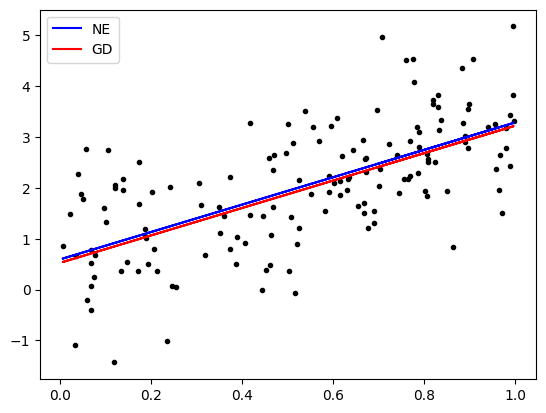

In [78]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()